### Theoretical cluster count covariances using TJPCov.
This notebook shows how to use TJPCov to calculate covariances, given a .sacc file.

We will
* Read in an appropriate yaml file
* Instantiate a `CovarianceBuilder` for cluster counts
* Calculate cluster count covariances and assemble the matrix
* Display the covariance / correlation coefficient
* Save the covariance back to .sacc

In [9]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import pyccl as ccl
import sacc
import pickle
from tjpcov.covariance_io import CovarianceIO
from tjpcov.covariance_cluster_counts import ClusterCounts

The .yaml file contains the reference to the .sacc file - so specify which .sacc file you want to use there. You can also specify if you want to use MPI or not.

This is a lengthy computation, so `mock_clusters_small.sacc` is small (only 2 richness, 2 redshift bins) to test calculations

In [12]:
input_yml = './clusters/conf_covariance_clusters.yaml'

In [13]:
nxn_cov = ClusterCounts(input_yml)
# TJPCov covariance
# cov_nxn = nxn_cov.get_covariance()

In [ ]:
# Uncomment to save the covariance array to pickle
# fname = os.path.join(data_dir, "clusters", "cov_nxn_large.pkl")
# with open(fname, 'wb') as ff:
#         pickle.dump(cov_nxn, ff)

That's it! Now you have a covariance matrix. 

Loading the pre-calculated covariance from pickle, we can now display it and save it to the .sacc file.

In [14]:
with open(f"../tests/data/clusters/cov_nxn_mpi_large.pkl", 'rb') as cov_file:
    cov_nxn = pickle.load(cov_file)
correlation = np.corrcoef(cov_nxn)

Text(0.5, 1.0, 'Covariance')

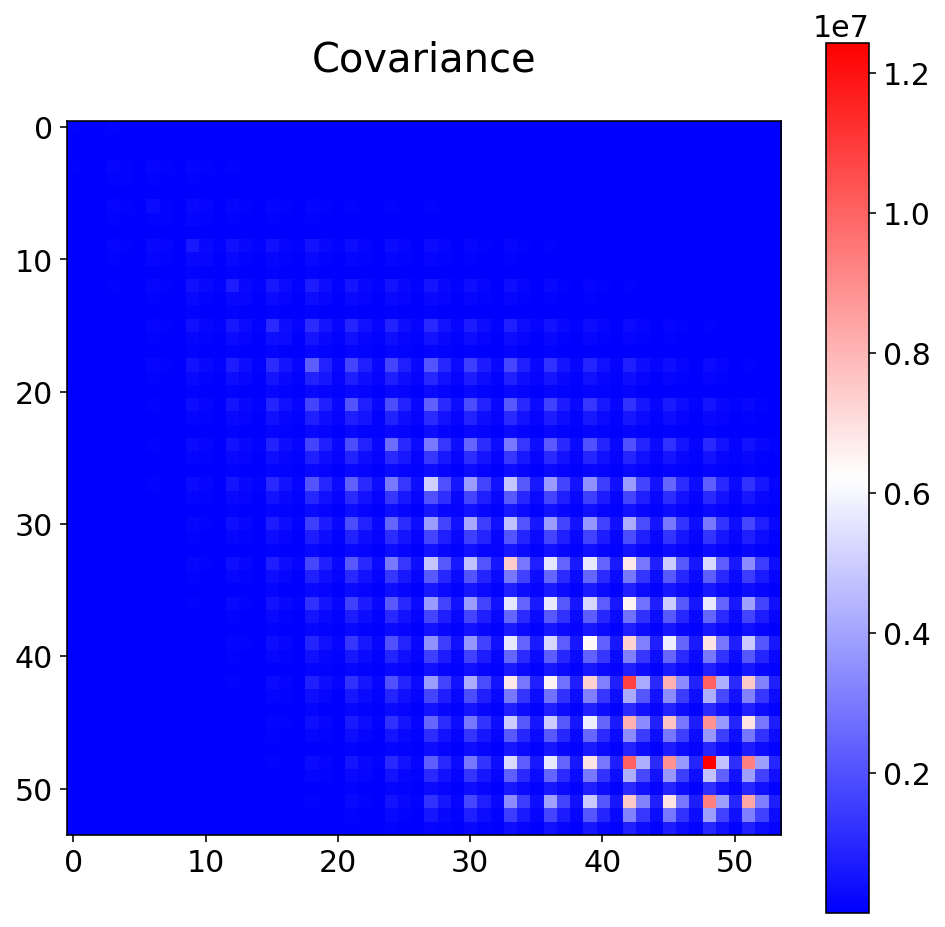

In [15]:
plt.figure(figsize=(8,8))
plt.imshow(cov_nxn, cmap='bwr')
plt.colorbar()
plt.title('Covariance')

Text(0.5, 1.0, 'Correlation')

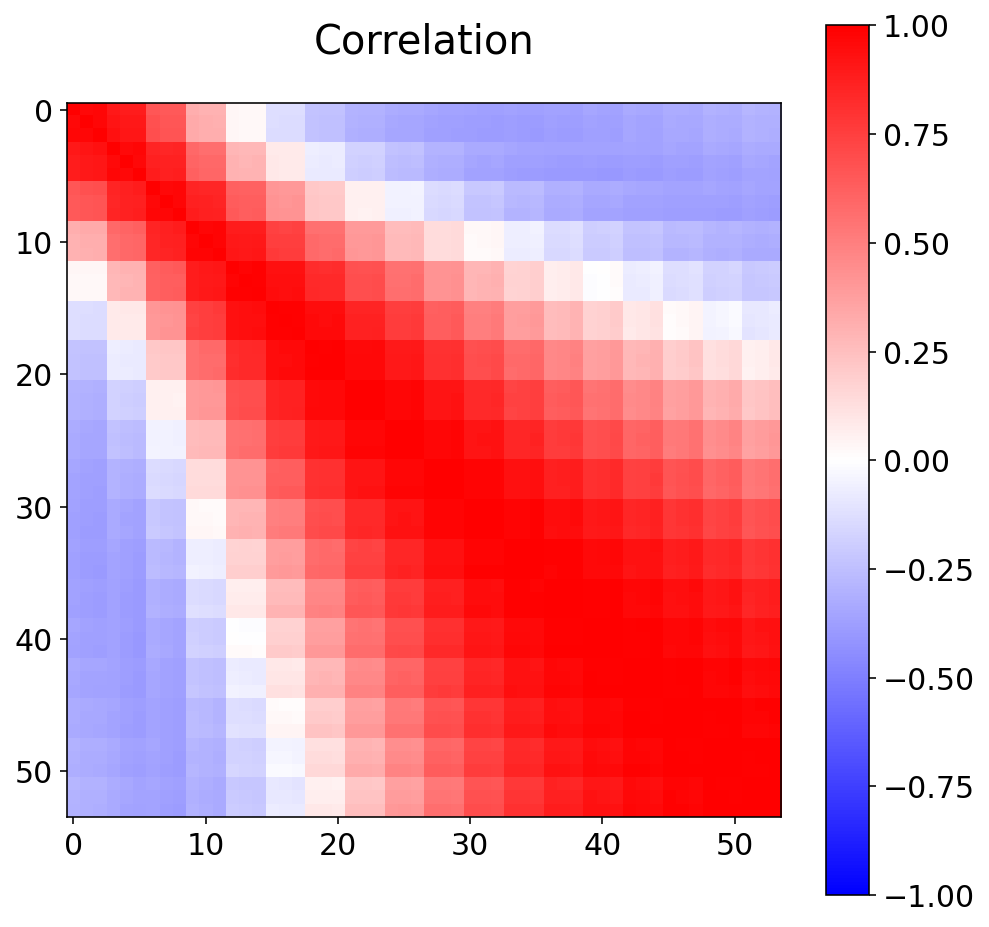

In [16]:
plt.figure(figsize=(8,8))
plt.imshow(correlation, cmap='bwr', vmax=1, vmin=-1)

plt.colorbar()
plt.title('Correlation')

Using CovarianceIO we can write the covariance into the sacc file.  Doing so below and reloading it to demonstrate its properly saving.

In [ ]:
cov_io = CovarianceIO(input_yml)
cov_io.create_sacc_cov(cov_nxn, output='mock_clusters_with_cov.sacc')
sacc_with_cov = sacc.Sacc.load_fits('mock_clusters_with_cov.sacc')

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(np.corrcoef(sacc_with_cov.covariance.covmat), cmap='bwr')